In [12]:
# Install necessary packages (if not already installed)
install.packages(c("ggplot2", "dplyr", "tidyr", "lubridate"))

# Load the libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [6]:
# Load the CSV file
crime_data <- read.csv("/content/US_Crime_DataSet.csv", header = TRUE)

In [7]:
# View the structure of the dataset
str(crime_data)

'data.frame':	638454 obs. of  24 variables:
 $ Record.ID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Agency.Code          : chr  "AK00101" "AK00101" "AK00101" "AK00101" ...
 $ Agency.Name          : chr  "Anchorage" "Anchorage" "Anchorage" "Anchorage" ...
 $ Agency.Type          : chr  "Municipal Police" "Municipal Police" "Municipal Police" "Municipal Police" ...
 $ City                 : chr  "Anchorage" "Anchorage" "Anchorage" "Anchorage" ...
 $ State                : chr  "Alaska" "Alaska" "Alaska" "Alaska" ...
 $ Year                 : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ Month                : chr  "January" "March" "March" "April" ...
 $ Incident             : int  1 1 2 1 2 1 2 1 2 3 ...
 $ Crime.Type           : chr  "Murder or Manslaughter" "Murder or Manslaughter" "Murder or Manslaughter" "Murder or Manslaughter" ...
 $ Crime.Solved         : chr  "Yes" "Yes" "No" "Yes" ...
 $ Victim.Sex           : chr  "Male" "Male" "Female" "Male" ...
 $ Victim.

In [8]:
colSums(is.na(crime_data))


Record.ID           Agency.Code           Agency.Name 
                    0                     0                     0 
          Agency.Type                  City                 State 
                    0                     0                     0 
                 Year                 Month              Incident 
                    0                     0                     0 
           Crime.Type          Crime.Solved            Victim.Sex 
                    0                     0                     0 
           Victim.Age           Victim.Race      Victim.Ethnicity 
                    0                     0                     0 
      Perpetrator.Sex       Perpetrator.Age      Perpetrator.Race 
                    0                     1                     0 
Perpetrator.Ethnicity          Relationship                Weapon 
                    0                     0                     0 
         Victim.Count     Perpetrator.Count         Record.Source 
                    0                     0                     0

In [9]:
crime_data[crime_data == "Unknown"] <- NA


In [10]:
 summary(crime_data)


   Record.ID      Agency.Code        Agency.Name        Agency.Type       
 Min.   :     1   Length:638454      Length:638454      Length:638454     
 1st Qu.:159614   Class :character   Class :character   Class :character  
 Median :319228   Mode  :character   Mode  :character   Mode  :character  
 Mean   :319228                                                           
 3rd Qu.:478841                                                           
 Max.   :638454                                                           
                                                                          
     City              State                Year         Month          
 Length:638454      Length:638454      Min.   :1980   Length:638454     
 Class :character   Class :character   1st Qu.:1987   Class :character  
 Mode  :character   Mode  :character   Median :1995   Mode  :character  
                                       Mean   :1996                     
                                   

In [11]:
crime_data$Crime.Solved <- as.factor(crime_data$Crime.Solved)
crime_data$Weapon <- as.factor(crime_data$Weapon)


In [13]:
# Convert 'Month' to a factor with ordered levels
crime_data$Month <- factor(crime_data$Month, levels = month.name)

# Convert 'Year' and 'Month' into a Date column for easier plotting
crime_data$Date <- as.Date(paste0(crime_data$Year, "-", match(crime_data$Month, month.name), "-01"))

# Handle missing values (e.g., replace NA in numeric columns with 0)
crime_data$Victim.Age[is.na(crime_data$Victim.Age)] <- 0
crime_data$Perpetrator.Age[is.na(crime_data$Perpetrator.Age)] <- 0

# Convert 'Crime.Solved' to a factor
crime_data$Crime.Solved <- as.factor(crime_data$Crime.Solved)


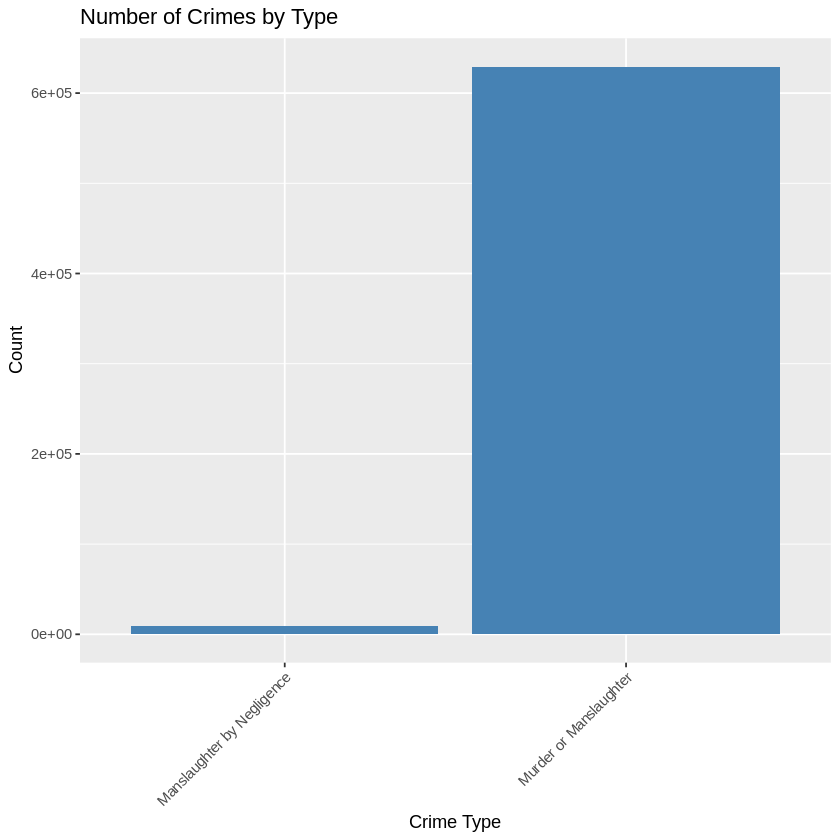

In [14]:
ggplot(crime_data, aes(x = Crime.Type)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Number of Crimes by Type", x = "Crime Type", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


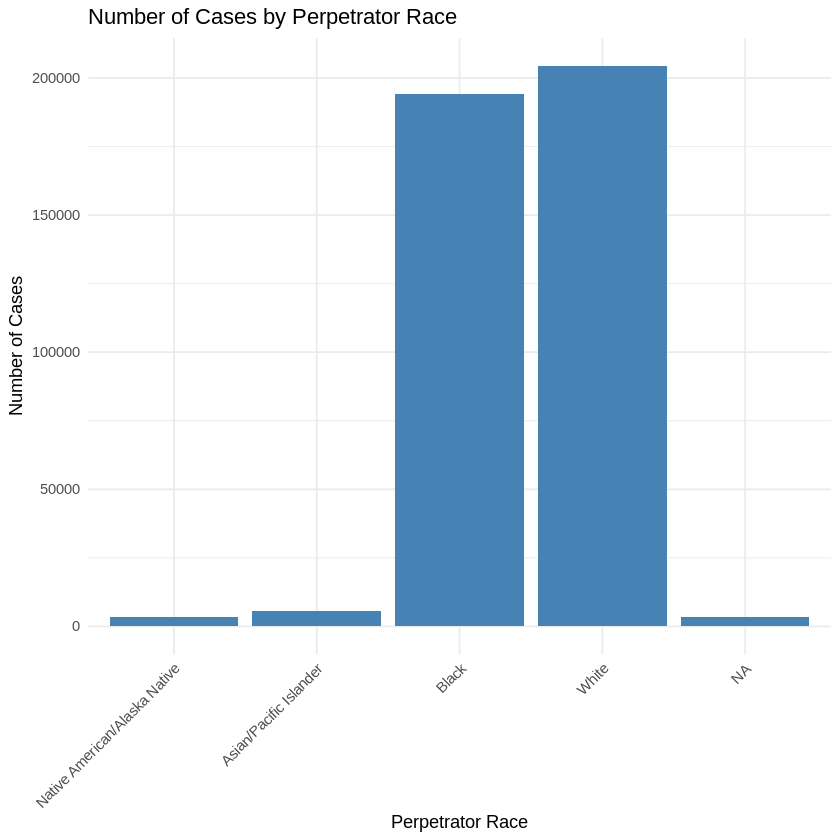

In [42]:
# Count the number of cases by Perpetrator.Race
perpetrator_race_counts <- crime_data %>%
  count(Perpetrator.Race)

# Create a bar chart
ggplot(perpetrator_race_counts, aes(x = reorder(Perpetrator.Race, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Number of Cases by Perpetrator Race",
       x = "Perpetrator Race",
       y = "Number of Cases") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

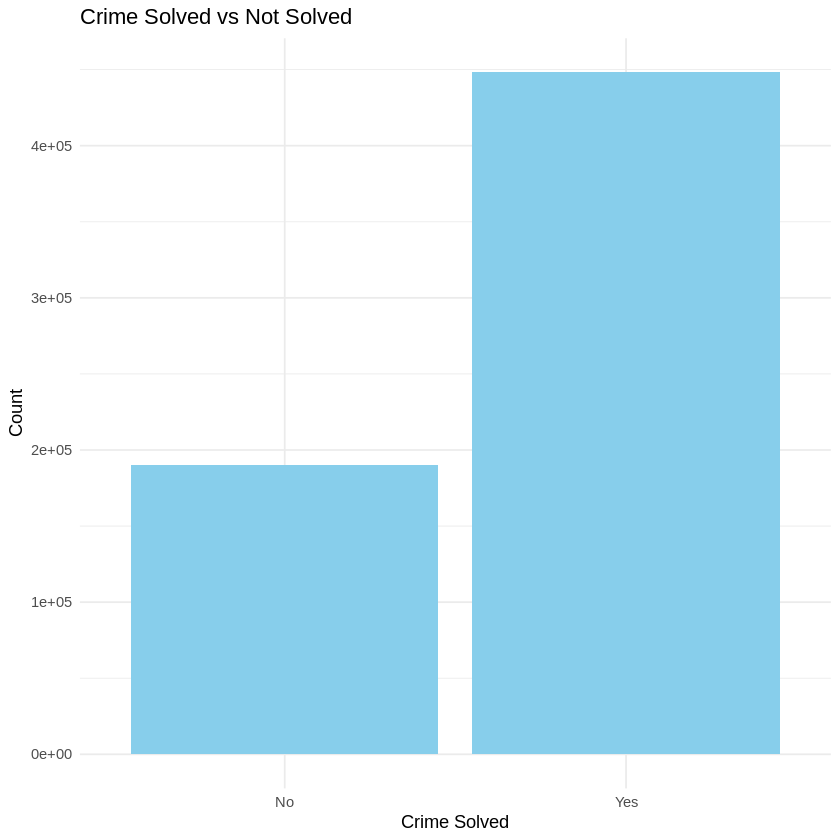

In [16]:
 # Bar chart: Crime Solved vs Not Solved
ggplot(crime_data, aes(x = Crime.Solved)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Crime Solved vs Not Solved", x = "Crime Solved", y = "Count") +
  theme_minimal()


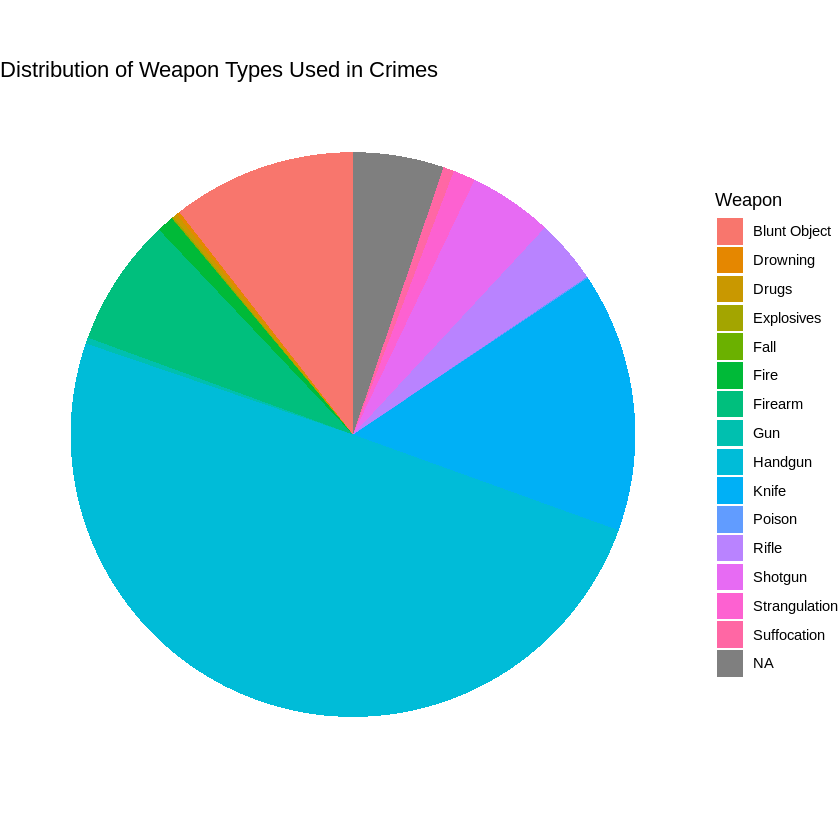

In [19]:
# Create a summary table for Weapon types
weapon_summary <- crime_data %>%
  count(Weapon) %>%
  mutate(Percentage = n / sum(n) * 100)

# Generate the pie chart
ggplot(weapon_summary, aes(x = "", y = Percentage, fill = Weapon)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Distribution of Weapon Types Used in Crimes") +
  theme_void()

In [27]:
# Load necessary library
library(dplyr)

# Remove rows where Victim.Age or Perpetrator.Age is less than or equal to 0 or greater than 100
crime_data <- crime_data %>%
  filter(Victim.Age > 0 & Victim.Age < 95,
         Perpetrator.Age > 0 & Perpetrator.Age <95)

# View the cleaned data
head(crime_data)


,Record.ID,Agency.Code,Agency.Name,Agency.Type,City,State,Year,Month,Incident,Crime.Type,⋯,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count,Record.Source,Date
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<int>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>,<int>,<int>,<chr>,<date>
1,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,⋯,Male,15,Native American/Alaska Native,NA,Acquaintance,Blunt Object,0,0,FBI,1980-01-01
2,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,⋯,Male,42,White,NA,Acquaintance,Strangulation,0,0,FBI,1980-03-01
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,⋯,Male,42,White,NA,Acquaintance,Strangulation,0,0,FBI,1980-04-01
4,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,⋯,Male,36,White,NA,Acquaintance,Rifle,0,0,FBI,1980-05-01
5,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,⋯,Male,27,Black,NA,Wife,Knife,0,0,FBI,1980-05-01
6,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,⋯,Male,40,NA,NA,NA,Firearm,0,1,FBI,1980-06-01


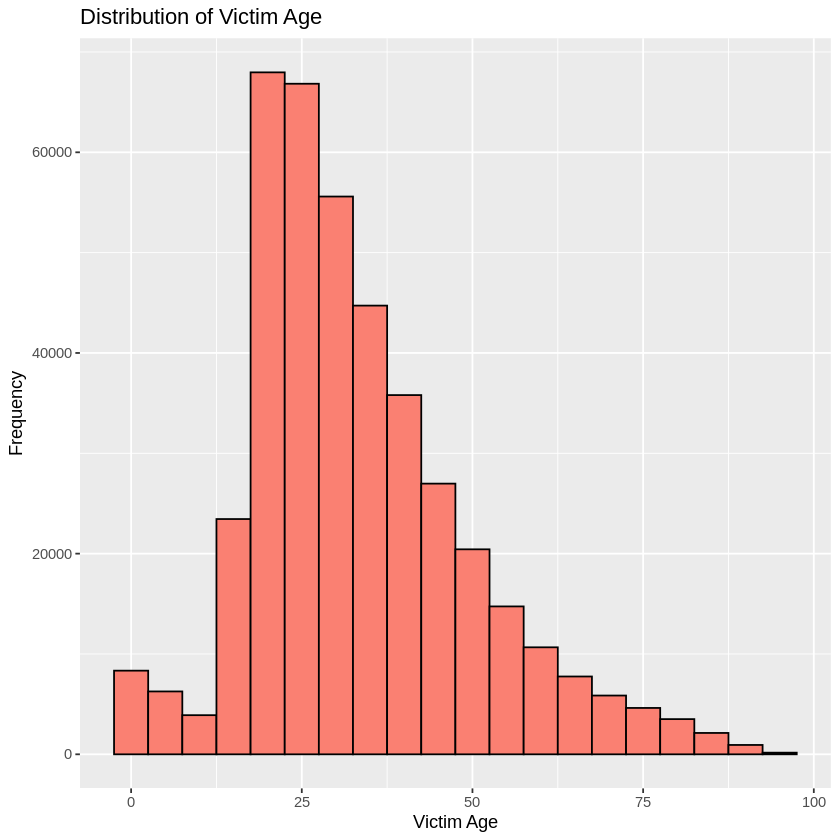

In [28]:
ggplot(crime_data, aes(x = Victim.Age)) +
  geom_histogram(binwidth = 5, fill = "salmon", color = "black") +
  labs(title = "Distribution of Victim Age", x = "Victim Age", y = "Frequency")


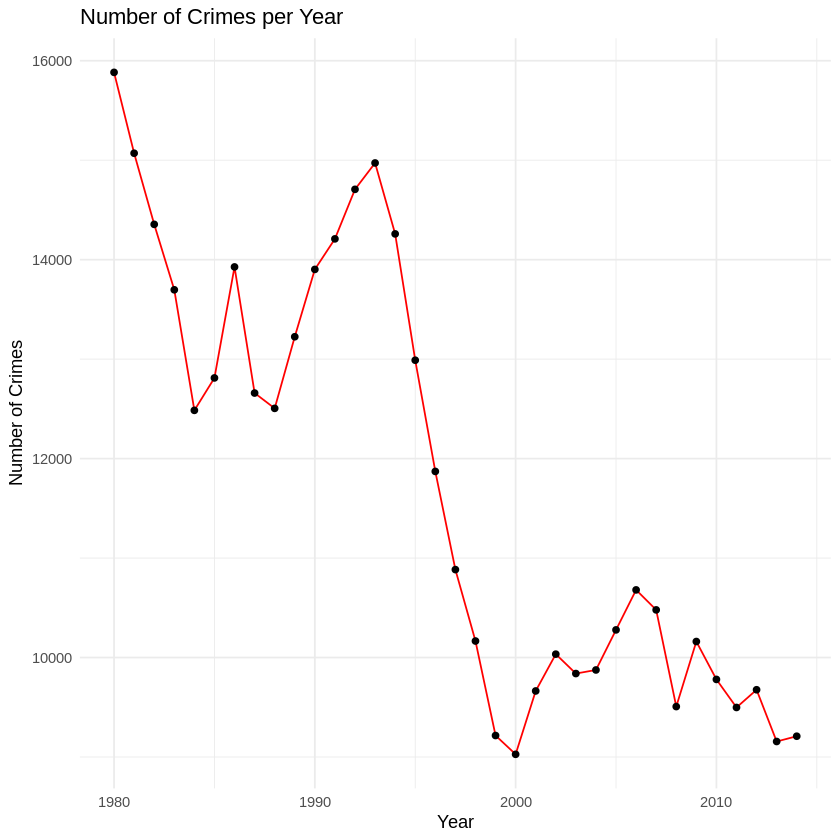

In [29]:
# Timeline Chart: Number of Crimes per Year
crime_by_year <- crime_data %>%
  group_by(Year) %>%
  summarise(crime_count = n())

ggplot(crime_by_year, aes(x = Year, y = crime_count)) +
  geom_line(color = "red") +
  geom_point() +
  labs(title = "Number of Crimes per Year", x = "Year", y = "Number of Crimes") +
  theme_minimal()


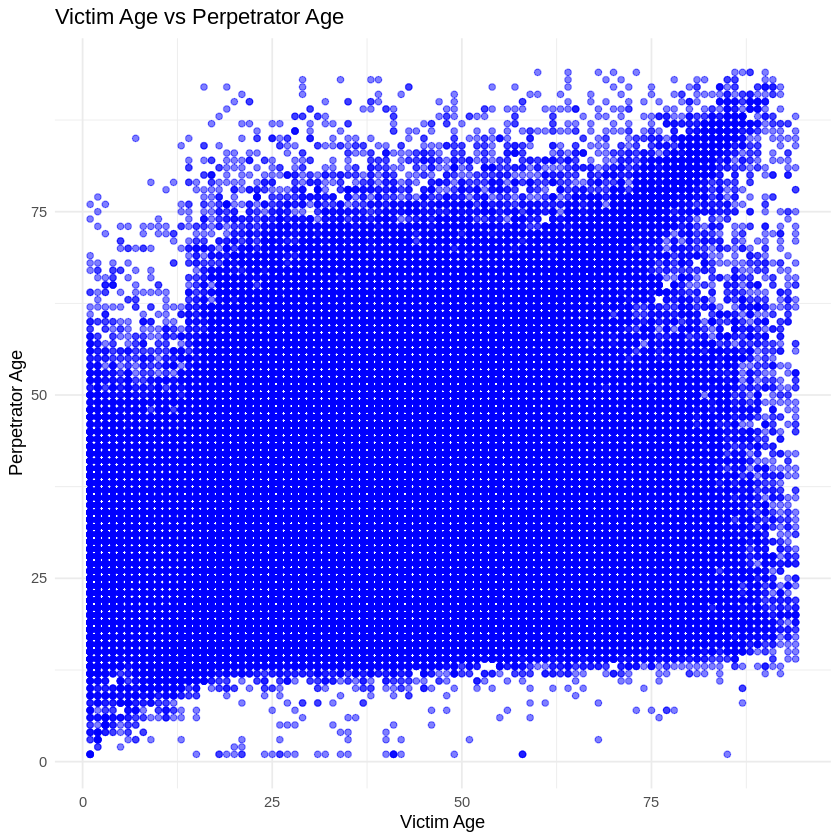

In [31]:
# Scatter plot: Victim Age vs Perpetrator Age
ggplot(crime_data, aes(x = Victim.Age, y = Perpetrator.Age)) +
  geom_point(alpha = 0.5, color = "blue") +
  labs(title = "Victim Age vs Perpetrator Age", x = "Victim Age", y = "Perpetrator Age") +
  theme_minimal()


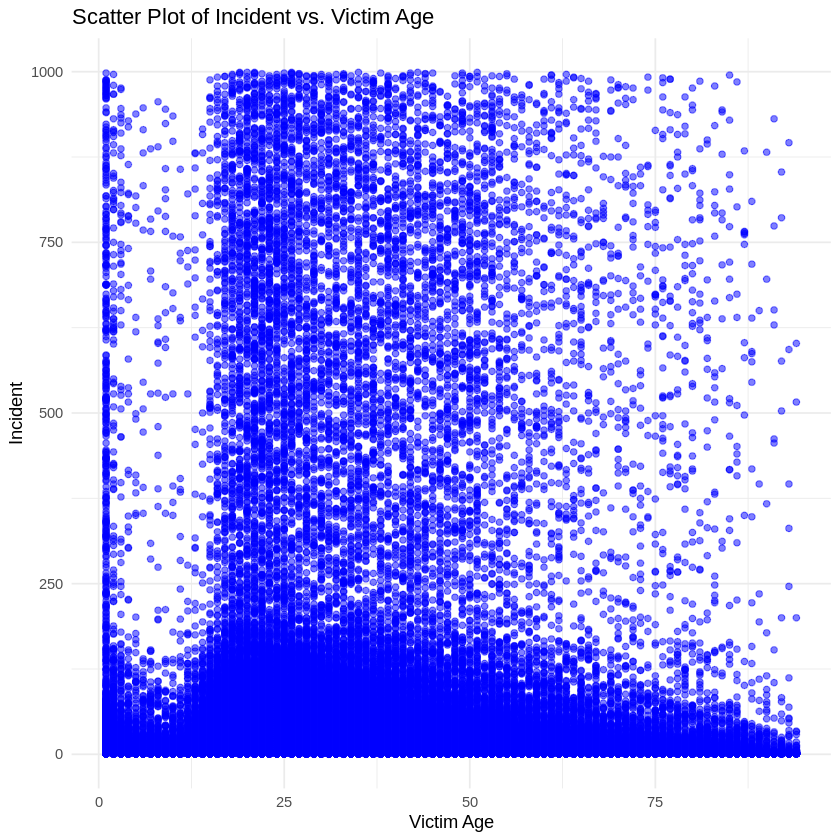

In [36]:
# Create a scatter plot of Incident vs. Victim Age
ggplot(crime_data, aes(y = Incident, x = Victim.Age)) +
  geom_point(alpha = 0.5, color = "blue") +  # Add points with transparency and color
  labs(title = "Scatter Plot of Incident vs. Victim Age",
       y = "Incident",
       x = "Victim Age") +
  theme_minimal()

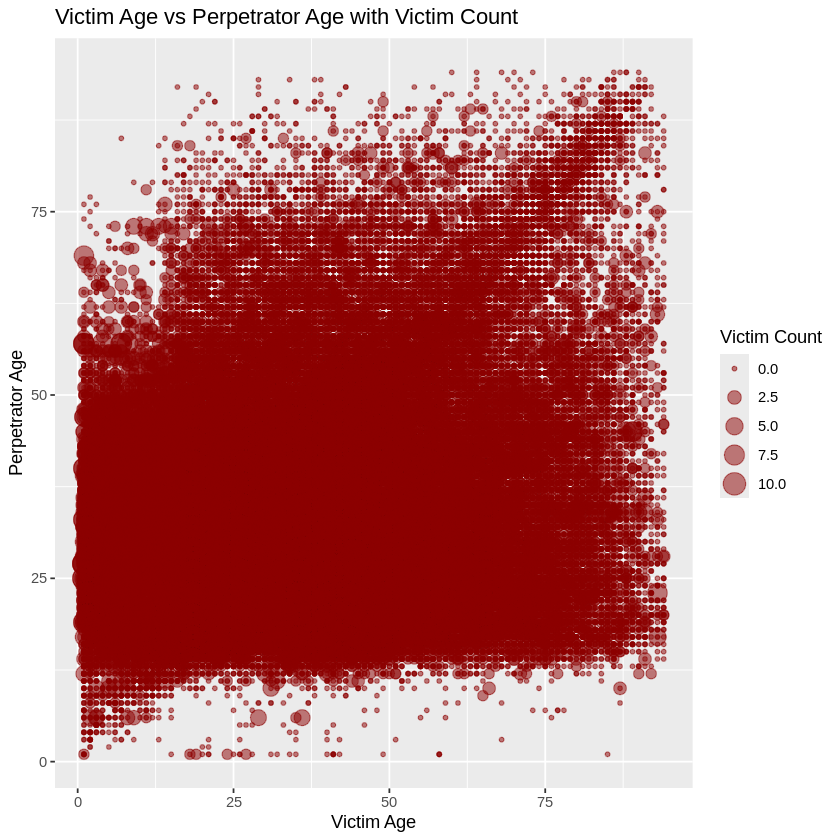

In [37]:
ggplot(crime_data, aes(x = Victim.Age, y = Perpetrator.Age, size = Victim.Count)) +
  geom_point(alpha = 0.5, color = "darkred") +
  labs(title = "Victim Age vs Perpetrator Age with Victim Count", x = "Victim Age", y = "Perpetrator Age", size = "Victim Count")


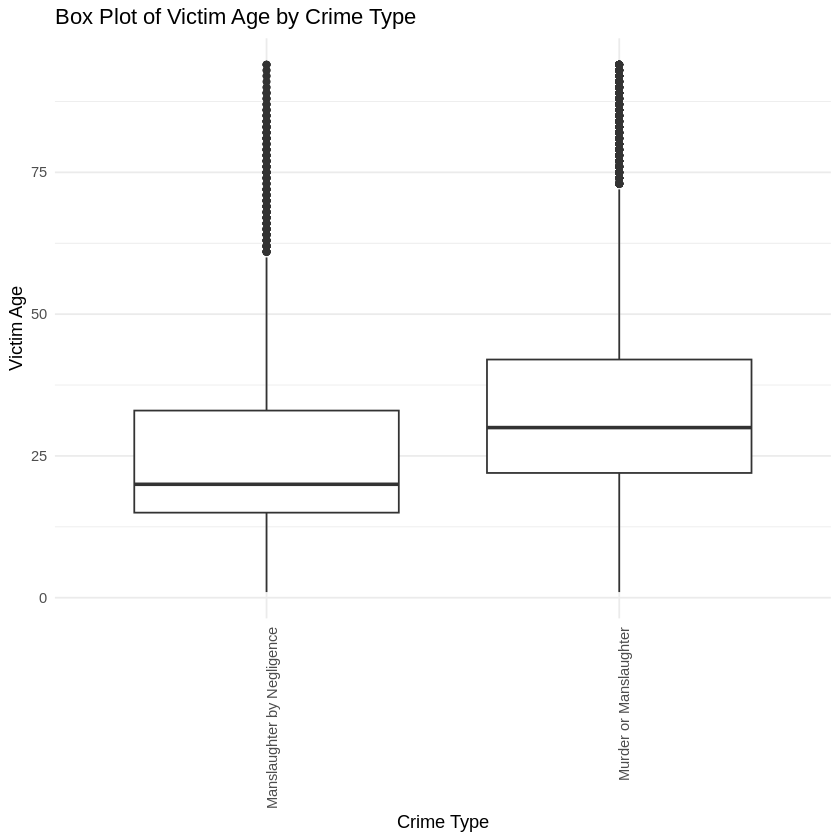

In [38]:
ggplot(crime_data, aes(x = Crime.Type, y = Victim.Age)) +
  geom_boxplot() +
  labs(title = "Box Plot of Victim Age by Crime Type",
       x = "Crime Type",
       y = "Victim Age") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
